<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 132
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

# above- we fail to reject null hypothesis pvalue = 0.8810148425137847 so rows/cols --so independent

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

# above - low likelyhood we would see this data so we reject null hypotheis--something happening but we dont know

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)

# this is very important--

(array([ 42.,  79., 328., 175., 136., 167.,  31.,  36.,   3.,   3.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

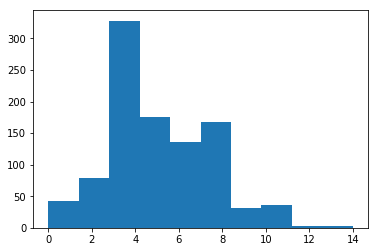

In [0]:
import matplotlib.pyplot as plt
plt.hist(sample)

In [0]:
print(normaltest(sample))  # Pretty clearly not normal so with a very small p value we know that this data is not a normal distribution

NormaltestResult(statistic=49.13207389384102, pvalue=2.1434122661072156e-11)


In [0]:
# Get this function to work - determine which data columns in dataset are not distribut
def my_func(df):
  interesting_cols = []
  if # check if type of column is numerical so fix this line with the if
  for col in df.columns:
    _, pvalue = normaltest(df['col'])
    if pvalue > p_thres:
      interesting_cols.append(pvalue)
  return interesting_cols

In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## T-test Assumptions

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means

Are the means of our voting data independent (do not affect the outcome of one another)?
  
The best way to increase thel likelihood of our means being independent is to randomly sample (which we did not do).


In [0]:
from scipy.stats import ttest_ind

?ttest_ind

- "Homogeneity" of Variance? 

Is the magnitude of the variance between the two roughly the same?

I think we're OK on this one for the voting data, although it probably could be better, one party was larger than the other.

If we suspect this to be a problem then we can use Welch's T-test

In [0]:
?ttest_ind

- "Dependent Variable" (sample means) are Distributed Normally

<https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>

Lots of statistical tests depend on normal distributions. We can test for normality using Scipy as was shown above.

This assumption is often assumed even if the assumption is a weak one. If you strongly suspect that things are not normally distributed, you can transform your data to get it looking more normal and then run your test. This problem typically goes away for large sample sizes (yay Central Limit Theorem) and is often why you don't hear it brought up. People declare the assumption to be satisfied either way. 



In [0]:
import matplotlib.pyplot as plt

In [0]:
skittles_fac_1 = np.random.normal(50, 5, size=100)
skittles_fac_1 = skittles_fac_1.round().astype(int)
skittles_fac_1[:10]

array([51, 45, 49, 52, 51, 57, 46, 47, 56, 57])

In [0]:
skittles_fac_1.mean()

51.39

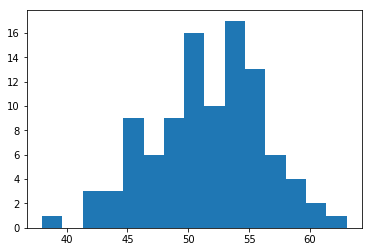

In [0]:
plt.hist(skittles_fac_1, bins=15);

In [0]:
skittles_fac_2 = np.random.normal(49.3, 5.5, size=100)
skittles_fac_2 = skittles_fac_2.round().astype(int)
skittles_fac_2[:10]

array([55, 50, 43, 45, 52, 48, 47, 41, 47, 38])

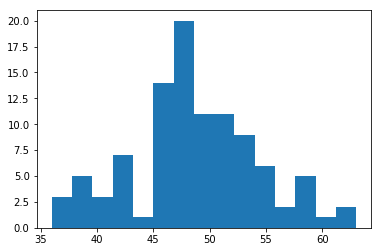

In [0]:
plt.hist(skittles_fac_2, bins=15);

In [0]:
# The null hypothesis was that the means of both of these distributions were the same so since threshold is .05, and pvalue is below that, i reject null hypothesis
ttest_ind(skittles_fac_1, skittles_fac_2)

Ttest_indResult(statistic=3.88603400367645, pvalue=0.00013892954338173182)

In [0]:
ttest_ind(skittles_fac_1, skittles_fac_2, equal_var=False) # if you reduce the sample sizes, you will notice difference between the pvalue of this and one above when using equal_var=False

Ttest_indResult(statistic=3.88603400367645, pvalue=0.000140433310911283)

# T-test doesn't say anything about the difference variances (standard deviations) - only their means

In [0]:
skittles_fac_1 = np.random.normal(50, 2, size=1000)
skittles_fac_1 = skittles_fac_1.round().astype(int)
skittles_fac_1[:10]

array([52, 49, 50, 51, 51, 54, 53, 53, 49, 54])

In [0]:
skittles_fac_2 = np.random.normal(50, 5, size=1000)
skittles_fac_2 = skittles_fac_2.round().astype(int)
skittles_fac_2[:10]

array([51, 52, 50, 61, 50, 39, 50, 54, 53, 58])

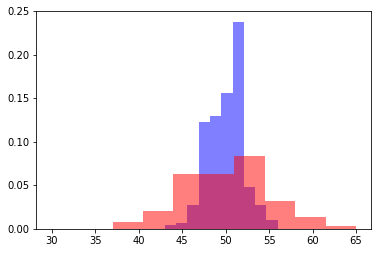

In [0]:
plt.hist(skittles_fac_1, alpha=0.5, color='b', density=True)  # divides every bucket by 1000
plt.hist(skittles_fac_2, alpha=0.5, color='r', density=True);

In [0]:
# We have two sample distributions, lets run ttest
ttest_ind(skittles_fac_1, skittles_fac_2)

Ttest_indResult(statistic=1.2693356613738722, pvalue=0.20446920675345354)

# KS-test

In [0]:
# https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test

In [0]:
from scipy.stats import ks_2samp

In [0]:
# using two sample test
ks_2samp(skittles_fac_1, skittles_fac_2)

Ks_2sampResult(statistic=0.226, pvalue=8.66144540069212e-23)

In [0]:
# the null hypothesis for the same dataset, between the two tests, ttest and ks-test, are not the same
# For t-test the null is that the two means of two samles are the same, and since high pvalue, we fail to reject null
# For k-s test, the null is that the two distributions are the same and since low pvalue, we reject null because they are not the same

In [0]:
# ks not only tells us the relationship between the two means but also aobut the shape between the two distributions

In [0]:
# Lets generate a function to create two distributions
def get_two_norm_dist(mus, sigmas, sizes):
  dist_list = []
  for i in range(2): # 2 since we want two distributions
    dist = np.random.normal(mus[i], sigmas[i], size=sizes[i]) # creates the distribution on 1st iteration, then iterates again for second one
    dist = dist.round().astype(int)  # rounds into integer
    dist_list.append(dist)
  return dist_list

In [0]:
dist_1, dist_2 = get_two_norm_dist(mus=(50, 50), sigmas=(3, 3.3), sizes=(1000, 500))

In [0]:
# Run a ttest
ttest_ind(dist_1, dist_2)

Ttest_indResult(statistic=-0.5308156226425543, pvalue=0.5956252375712838)

In [0]:
# Run K-S test
ks_2samp(dist_1, dist_2)

Ks_2sampResult(statistic=0.036, pvalue=0.7762818525386279)

## Fair vs unfair dice example

In [0]:
unfair_die = np.array(150*[1] + 130*[2] + 50*[3] + 50*[4] + 130*[5] + 150*[6])

In [0]:
unfair_die.shape

(660,)

In [0]:
unfair_die.mean()

3.5

In [0]:
fair_die = np.array(110*[1] + 110*[2] + 110*[3] + 110*[4] + 110*[5] + 110*[6])

In [0]:
fair_die.shape

(660,)

In [0]:
fair_die.mean()

3.5

In [0]:
ttest_ind(unfair_die, fair_die) #pvalue is highest possible value of 1

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [0]:
ks_2samp(unfair_die, fair_die) # pvalue is really low--shows that this test can detect difference in distributions when means are identical

Ks_2sampResult(statistic=0.09090909090909091, pvalue=0.008524685542396894)

## Central Limit Theorem



In [0]:
np.random.binomial(n=1, p=.5, size=n_size) # pulled this out of the below function to look at it

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0])

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N = 20000   # N is the number of samples i draw from distribution
n_size = 30 # n is size of the sample
sample_means = []
for x in range(0,N):
  coinflips = np.random.binomial(n=1, p=.5, size=n_size)  # each sample contains 15 flips that are either 0 or 1. The 0.4 was the mean of the first sample of 15 flips, etc
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

20000
[0.43333333333333335, 0.4666666666666667, 0.5, 0.4666666666666667, 0.5666666666666667, 0.4666666666666667, 0.5333333333333333, 0.5333333333333333, 0.43333333333333335, 0.5333333333333333, 0.4, 0.5, 0.36666666666666664, 0.4666666666666667, 0.6666666666666666, 0.4, 0.4, 0.3333333333333333, 0.5, 0.5333333333333333, 0.5, 0.36666666666666664, 0.5333333333333333, 0.6, 0.3, 0.4, 0.6333333333333333, 0.6, 0.6, 0.5, 0.3333333333333333, 0.5333333333333333, 0.4666666666666667, 0.4, 0.4666666666666667, 0.5, 0.6666666666666666, 0.3, 0.6, 0.26666666666666666, 0.4, 0.43333333333333335, 0.43333333333333335, 0.5, 0.6333333333333333, 0.4666666666666667, 0.5333333333333333, 0.43333333333333335, 0.4, 0.6, 0.5333333333333333, 0.5, 0.6, 0.5, 0.4, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.6, 0.4666666666666667, 0.36666666666666664, 0.5666666666666667, 0.36666666666666664, 0.36666666666666664, 0.4666666666666667, 0.5666666666666667, 0.5, 0.5666666666666667, 0.4666666666666667, 0.53333

In [0]:
df = pd.DataFrame({'single_sample': one_sample})
df.head()

,single_sample
0,0
1,0
2,0
3,0
4,0


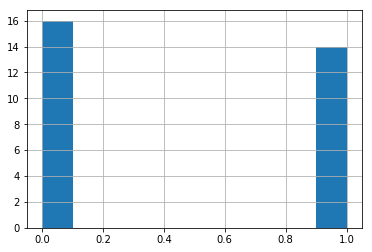

In [0]:
df.single_sample.hist();

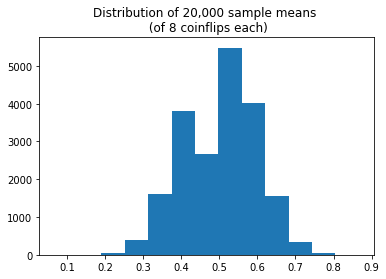

In [0]:
ax = plt.hist(sample_means, bins=13)
plt.title('Distribution of 20,000 sample means \n (of 8 coinflips each)');

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

In [0]:
sample_means_small = []
sample_means_large = []
for x in range(0,3000):
  coinflips_small = np.random.binomial(n=1, p=.5, size=20)
  coinflips_large = np.random.binomial(n=1, p=.5, size=100)
  one_small_sample = coinflips_small
  one_small_large = coinflips_large
  sample_means_small.append(coinflips_small.mean())
  sample_means_large.append(coinflips_large.mean())

print(len(sample_means_small))
print(sample_means_small)

3000
[0.45, 0.3, 0.6, 0.45, 0.5, 0.7, 0.55, 0.5, 0.5, 0.55, 0.3, 0.45, 0.5, 0.4, 0.35, 0.45, 0.65, 0.5, 0.45, 0.5, 0.5, 0.45, 0.45, 0.45, 0.55, 0.55, 0.65, 0.6, 0.5, 0.45, 0.4, 0.5, 0.55, 0.5, 0.55, 0.55, 0.55, 0.65, 0.3, 0.65, 0.5, 0.4, 0.5, 0.5, 0.55, 0.5, 0.45, 0.3, 0.3, 0.65, 0.25, 0.5, 0.5, 0.65, 0.55, 0.5, 0.35, 0.55, 0.5, 0.4, 0.35, 0.5, 0.55, 0.65, 0.6, 0.45, 0.65, 0.4, 0.5, 0.5, 0.45, 0.35, 0.45, 0.6, 0.5, 0.35, 0.65, 0.6, 0.65, 0.45, 0.4, 0.45, 0.6, 0.4, 0.45, 0.4, 0.2, 0.5, 0.5, 0.5, 0.5, 0.55, 0.5, 0.65, 0.55, 0.55, 0.5, 0.5, 0.25, 0.55, 0.5, 0.55, 0.6, 0.5, 0.75, 0.35, 0.45, 0.6, 0.7, 0.6, 0.45, 0.5, 0.35, 0.5, 0.55, 0.6, 0.3, 0.5, 0.6, 0.5, 0.5, 0.5, 0.45, 0.55, 0.55, 0.35, 0.55, 0.4, 0.45, 0.5, 0.35, 0.35, 0.3, 0.45, 0.4, 0.65, 0.6, 0.55, 0.65, 0.55, 0.5, 0.45, 0.55, 0.65, 0.5, 0.5, 0.7, 0.55, 0.6, 0.3, 0.35, 0.3, 0.45, 0.5, 0.55, 0.55, 0.45, 0.5, 0.5, 0.55, 0.35, 0.45, 0.45, 0.5, 0.3, 0.55, 0.55, 0.5, 0.3, 0.65, 0.65, 0.35, 0.4, 0.45, 0.55, 0.25, 0.45, 0.4, 0.6, 0.65, 0

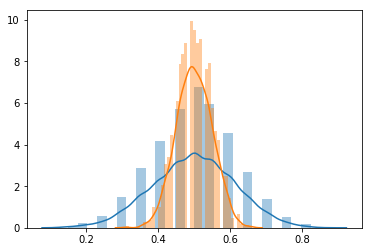

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
fix, ax = plt.subplots()
for sample in [sample_means_small, sample_means_large]:
  sns.distplot(sample)

## Standard Error of the Mean

What does it mean to "estimate"? the Population mean?

In [0]:
# Generate wait times for 2000 days
n_patients = 10*np.random.poisson(2.5, 2000)
n_patients

array([40, 20, 10, ..., 30, 10, 30])

In [0]:
# To see all possible values of this distribution (10 to 90 patients)
np.unique(n_patients)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

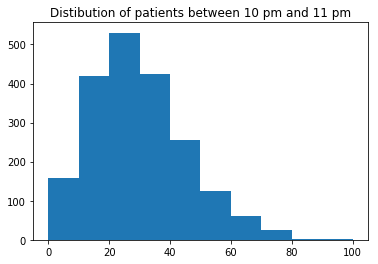

In [0]:
plt.hist(n_patients)
plt.title('Distibution of patients between 10 pm and 11 pm');

In [0]:
# Mean in above distribution is closer to left
n_patients.mean()

24.865

In [0]:
# Median is less than the mean above
np.median(n_patients)

20.0

In [0]:
# Create another sample distribution
population = pd.Series(10*np.random.poisson(2.5, 1000000))
population[:10]

0    50
1    20
2    20
3    70
4    30
5    40
6    10
7    20
8    10
9    40
dtype: int64

In [0]:
# generate more samples instead of one using population above
sample_means = []
for _ in range(1000):
  m = population.sample(100).mean()
  sample_means.append(m)

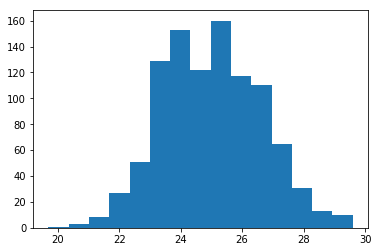

In [0]:
plt.hist(sample_means, bins=15);

## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [0]:
# https://www.youtube.com/watch?v=J1twbrHel3o
# https://www.youtube.com/watch?v=hlM7zdf7zwU
# https://www.youtube.com/watch?v=27iSnzss2wM

In [0]:
# Generate a theoretical population and give some context to it, politicians who want to figure out teh outcome of the election will be, 1,000,000 citizens, probability of .45 (two candidates, A and B--45% will vote for A, 55% will vote for B)
pop = pd.Series(np.random.binomial(1, p=0.45, size=1000000))
pop.sum()

449837

In [0]:
# So number of people that will vote for A is 449837 for example

In [0]:
from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)  # stats.t.ppf((1 + confidence) / 2.0, n - 1) this computes t
  return (mean, mean - interval, mean + interval)  # returns mean of the data itself, minus the interal-upper and lower bounds

In [0]:
# sample
sample_size = 100  # 100 people in city
sample = pop.sample(sample_size)
sample.head()

44443     0
852258    0
4106      0
167816    0
703543    0
dtype: int64

In [0]:
# now we can get our sample mean
sample_mean = sample.mean()  # average on how people would vote
sample_std = np.std(sample, ddof=1) # set ddof to 1 for the std
print(sample_mean, sample_std)

0.42 0.49604496374885837


In [0]:
# now calculate the standard error
standard_error = sample_std/np.sqrt(sample_size)
standard_error

0.049604496374885836

In [0]:
# Now let's get the t (upper and lower bounds)
t = 1.984 # 95% confidence   # use to get from a table in a book
(sample_mean, sample_mean - t*standard_error, sample_mean + t*standard_error)
# So what this says, in 95 cases out of 100, on average, 95% will produce range that will contain a population mean of .45 and 5% will have a confidence interval that will not contain the population mean

(0.42, 0.3215846791922265, 0.5184153208077735)

In [0]:
# just run this code from function above and compare to above---very close
confidence_interval(sample, confidence=0.95)

(0.42, 0.32157391742190056, 0.5184260825780994)

## Graphically Represent a Confidence Interval

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

In [0]:
import numpy as np

coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())

print(coinflip_means)

[0.7333333333333333, 0.43333333333333335, 0.5, 0.43333333333333335, 0.5, 0.5, 0.5333333333333333, 0.5, 0.4, 0.43333333333333335, 0.3333333333333333, 0.5333333333333333, 0.5333333333333333, 0.4666666666666667, 0.5, 0.6, 0.6333333333333333, 0.5, 0.3333333333333333, 0.43333333333333335, 0.4666666666666667, 0.43333333333333335, 0.4666666666666667, 0.5333333333333333, 0.43333333333333335, 0.7, 0.7, 0.5333333333333333, 0.5, 0.6666666666666666, 0.43333333333333335, 0.43333333333333335, 0.4, 0.5666666666666667, 0.5333333333333333, 0.6333333333333333, 0.4666666666666667, 0.5333333333333333, 0.36666666666666664, 0.4666666666666667, 0.4, 0.6333333333333333, 0.5666666666666667, 0.5666666666666667, 0.7333333333333333, 0.4, 0.4666666666666667, 0.6, 0.5333333333333333, 0.6333333333333333, 0.4666666666666667, 0.5333333333333333, 0.43333333333333335, 0.5, 0.36666666666666664, 0.4, 0.5666666666666667, 0.5, 0.36666666666666664, 0.5666666666666667, 0.7, 0.43333333333333335, 0.36666666666666664, 0.56666666

In [0]:
# Sample Size
n = len(coinflip_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(coinflip_means)
# Sample Standard Deviation
sample_std = np.std(coinflip_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (0.48189276007256693, 0.5181072399274331)


In [0]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)

CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9842169515086827
Confidence Interval (0.48189276007256693, 0.5181072399274331)


A null hypothesis that's just inside of our confidence interval == fail to reject



In [0]:
ttest_1samp(coinflip_means, .49)

Ttest_1sampResult(statistic=1.0958141381351718, pvalue=0.2758187277462794)

A null hypothesis that's just outside of our confidence interval == reject



In [0]:
ttest_1samp(coinflip_means, .4818927)

Ttest_1sampResult(statistic=1.9842235343454973, pvalue=0.04999925456754134)

## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

In [0]:
# make a crosstab
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


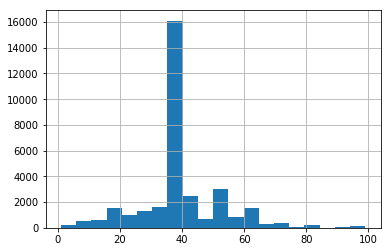

In [0]:
df['hours-per-week'].hist(bins=20);  # focus on hours per week

In [0]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [0]:
# see if difference in sex in hours per week worked so turn hours-per-week into a category, nonnumerical and compare to sex
cut_points = [0, 9, 19, 29, 39, 49, 500]  # cutoff points for hours per week
label_names = ['0-9','10-19','20-29','30-39','40-49','50+'] # splitting it into these buckets
df['hours_per_week_categories'] = pd.cut(df['hours-per-week'], cut_points, labels=label_names)
df['hours_per_week_categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [0]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [0]:
# now create the crosstab
df = df.sort_values(by='hours_per_week_categories') # technically not needed but bug in Pandas and totals will be wrong so sorting it to fix that issue
# https://github.com/pandas-dev/pandas/issues/25278  
contingency_table = pd.crosstab(df['sex'], df['hours_per_week_categories'], margins=True)
contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i\ total})(column_{j\ total} ) }{(\text{total observations})}  
\end{align}

In [0]:
row_sums = contingency_table.iloc[0:2, 6].values  # extract 0 row to 2, not including 2
col_sums = contingency_table.iloc[2, 0:6].values

print(row_sums)
print(col_sums)

[10771 21790]
[  458  1246  2392  3667 18336  6462]


In [0]:
total = contingency_table.loc['All','All']
total

32561

In [0]:
# showing how to manually get chi squared, although can do throug scipy
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 6)
[[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

In [0]:
observed = pd.crosstab(df['sex'], df['hours_per_week_categories']).values
print(observed.shape)
observed

(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

In [0]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

2287.190943926107

In [0]:
# https://people.smp.uq.edu.au/YoniNazarathy/stat_models_B_course_spring_07/distributions/chisqtab.pdf   ---chi squard table 

## Run a $\chi^{2}$ Test using Scipy

In [0]:
help(stats.chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)
# chi is 2287, p value so small its 0.0 so can reject it

2287.190943926107 0.0 5 [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


Null Hypothesis: Hours worked per week bins is **independent** of sex. 

Due to a p-value of 0, we REJECT the null hypothesis that hours worked per week and sex are independent, and conclude that there is an association between hours worked per week and sex. 